In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from visualization import perc, SetPlotRC, ApplyFont

# CorInfoMax

# CSM

In [2]:
df_results = pd.read_pickle(r"../Results/simulation_results_CSM_MNIST.pkl")
df_results.columns

Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list'],
      dtype='object')

In [3]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,Trn_ACC,Tst_ACC
0,1,0,CSM,"{'alphas_W': [0.5, 0.375], 'alphas_M': [-0.01]...","[0.9646833333333333, 0.9785166666666667, 0.981...","[0.9592, 0.9714, 0.9705, 0.9747, 0.9774, 0.976...",0.999967,0.9814
1,1,10,CSM,"{'alphas_W': [0.5, 0.375], 'alphas_M': [-0.01]...","[0.9670166666666666, 0.97375, 0.98336666666666...","[0.9618, 0.9654, 0.9745, 0.9742, 0.9722, 0.972...",0.999850,0.9772
2,1,20,CSM,"{'alphas_W': [0.5, 0.375], 'alphas_M': [-0.01]...","[0.9669833333333333, 0.9730833333333333, 0.979...","[0.9631, 0.9662, 0.9698, 0.9755, 0.9755, 0.973...",0.999883,0.9767
3,1,30,CSM,"{'alphas_W': [0.5, 0.375], 'alphas_M': [-0.01]...","[0.9659833333333333, 0.9788333333333333, 0.981...","[0.962, 0.9703, 0.9724, 0.9754, 0.9757, 0.9731...",1.000000,0.9802
4,1,40,CSM,"{'alphas_W': [0.5, 0.375], 'alphas_M': [-0.01]...","[0.9658, 0.97855, 0.981, 0.9852833333333333, 0...","[0.9599, 0.9713, 0.9715, 0.9735, 0.9788, 0.976...",0.999983,0.9784
5,1,50,CSM,"{'alphas_W': [0.5, 0.375], 'alphas_M': [-0.01]...","[0.9687333333333333, 0.97565, 0.98313333333333...","[0.965, 0.966, 0.9726, 0.9727, 0.9768, 0.976, ...",0.997100,0.9750
6,1,60,CSM,"{'alphas_W': [0.5, 0.375], 'alphas_M': [-0.01]...","[0.9622833333333334, 0.9785, 0.981633333333333...","[0.9557, 0.9694, 0.9704, 0.9752, 0.9772, 0.975...",0.999833,0.9783
7,1,70,CSM,"{'alphas_W': [0.5, 0.375], 'alphas_M': [-0.01]...","[0.96395, 0.9721333333333333, 0.98156666666666...","[0.9598, 0.9643, 0.9724, 0.9658, 0.972, 0.9763...",0.098717,0.0980
8,1,80,CSM,"{'alphas_W': [0.5, 0.375], 'alphas_M': [-0.01]...","[0.9628333333333333, 0.9753333333333334, 0.979...","[0.9565, 0.9694, 0.9689, 0.9737, 0.9735, 0.969...",0.999983,0.9821
9,1,90,CSM,"{'alphas_W': [0.5, 0.375], 'alphas_M': [-0.01]...","[0.96505, 0.9754333333333334, 0.98311666666666...","[0.9607, 0.9672, 0.9738, 0.9728, 0.9694, 0.974...",0.999600,0.9792


In [4]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting

,setting_number,Trn_ACC,Tst_ACC
0,1,0.909492,0.89065


In [5]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmin()]['setting_number']
best_setting

1.0

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


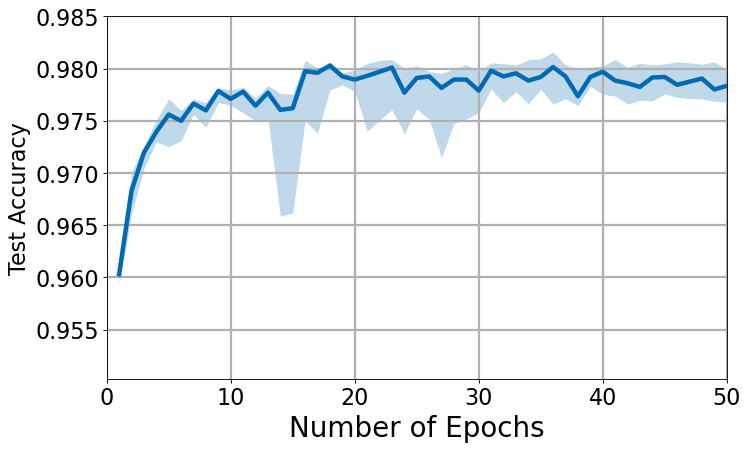

In [6]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("")
plt.axis([0.0,50,mean_[0] - 0.01,0.985])
ApplyFont(plt.gca())

# EP

In [7]:
df_results = pd.read_pickle(r"../Results/simulation_results_EP_MNIST.pkl")
df_results.columns

Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list'],
      dtype='object')

In [8]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,Trn_ACC,Tst_ACC
0,1,0,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.9564333333333334, 0.9715833333333334, 0.981...","[0.9511, 0.9621, 0.9701, 0.9716, 0.9732, 0.973...",0.999800,0.9752
1,1,10,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.9576, 0.9675166666666667, 0.9777, 0.9851333...","[0.9522, 0.9592, 0.9664, 0.9719, 0.972, 0.9728...",1.000000,0.9757
2,1,20,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.9533166666666667, 0.9724666666666667, 0.979...","[0.9455, 0.965, 0.9699, 0.9738, 0.9729, 0.9747...",0.999983,0.9776
3,1,30,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.9569166666666666, 0.9715833333333334, 0.981...","[0.9523, 0.9629, 0.9696, 0.9687, 0.9691, 0.973...",0.999567,0.9752
4,1,40,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.9607666666666667, 0.9740333333333333, 0.979...","[0.9556, 0.9642, 0.9669, 0.9707, 0.9705, 0.973...",0.999967,0.9769
5,1,50,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.9577166666666667, 0.9735, 0.978116666666666...","[0.9523, 0.9633, 0.967, 0.9731, 0.9721, 0.9733...",0.999800,0.9756
6,1,60,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.95725, 0.9740333333333333, 0.97928333333333...","[0.9498, 0.9657, 0.9693, 0.9689, 0.9716, 0.974...",1.000000,0.9760


In [9]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting

,setting_number,Trn_ACC,Tst_ACC
0,1,0.999874,0.976029


In [10]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmin()]['setting_number']
best_setting

1.0

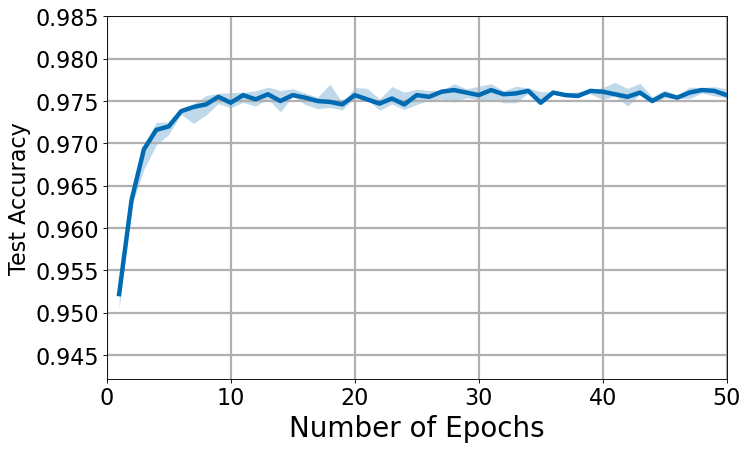

In [11]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("")
plt.axis([0.0,50,mean_[0] - 0.01,0.985])
ApplyFont(plt.gca())

# EP-Continual-Weight-Update

# PC

In [12]:
df_results = pd.read_pickle(r"../Results/simulation_results_PC_MNIST.pkl")
df_results.columns

Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list'],
      dtype='object')

In [13]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,Trn_ACC,Tst_ACC
0,1,0,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.95445, 0.9674666666666667, 0.9774, 0.980816...","[0.9512, 0.9617, 0.9714, 0.9707, 0.9737, 0.965...",0.993433,0.9715
1,1,10,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.95625, 0.8117, 0.9392333333333334, 0.954833...","[0.9517, 0.8247, 0.9376, 0.9503, 0.9604, 0.966...",0.994400,0.9709
2,1,20,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.9468, 0.9684666666666667, 0.974533333333333...","[0.9403, 0.9628, 0.9687, 0.9732, 0.9744, 0.977...",0.995567,0.9759
3,1,30,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.9597, 0.9650666666666666, 0.976566666666666...","[0.9547, 0.9591, 0.9681, 0.97, 0.9731, 0.974, ...",0.987450,0.9670
4,1,40,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.9545333333333333, 0.8729833333333333, 0.948...","[0.9514, 0.877, 0.9472, 0.9549, 0.9598, 0.9624...",0.967350,0.9544


In [14]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting

,setting_number,Trn_ACC,Tst_ACC
0,1,0.98764,0.96794


In [15]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmin()]['setting_number']
best_setting

1.0

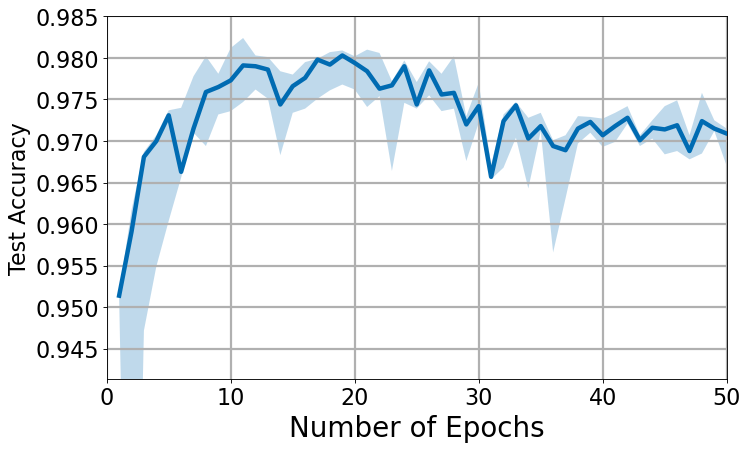

In [16]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("")
plt.axis([0.0,50,mean_[0] - 0.01,0.985])
ApplyFont(plt.gca())

# PC-Nudge

In [17]:
df_results = pd.read_pickle(r"../Results/simulation_results_PCNudge_MNIST.pkl")
df_results.columns

Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list'],
      dtype='object')

In [18]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,Trn_ACC,Tst_ACC
0,1,0,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.9395166666666667, 0.9529833333333333, 0.960...","[0.94, 0.9524, 0.9579, 0.9634, 0.9654, 0.9693,...",0.993933,0.9798


In [19]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting

,setting_number,Trn_ACC,Tst_ACC
0,1,0.993933,0.9798


In [20]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmin()]['setting_number']
best_setting

1.0

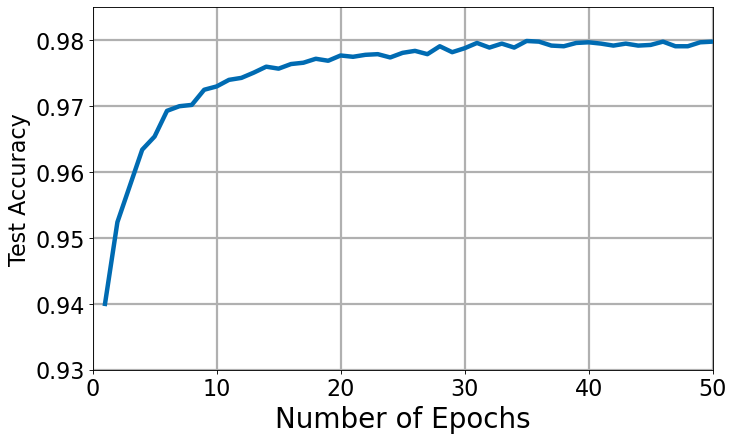

In [21]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("")
plt.axis([0.0,50,mean_[0] - 0.01,0.985])
ApplyFont(plt.gca())

# Altogether